# 0. Veri Setinin Hazırlanması

Veri Seti ve Adresi:

Jobs and Salaries in Data Science : https://www.kaggle.com/datasets/iamsouravbanerjee/airline-dataset?select=Airline+Dataset+Updated+-+v2.csv

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


# Görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns
# Diğer örnek görselleştirme kütüphaneleri
from plotnine import ggplot

/kaggle/input/airline-dataset/Airline Dataset Updated.csv
/kaggle/input/airline-dataset/Airline Dataset Updated - v2.csv
/kaggle/input/airline-dataset/Airline Dataset.csv


In [2]:
airl_data=pd.read_csv(filepath_or_buffer = "//kaggle/input/airline-dataset/Airline Dataset Updated - v2.csv")
airldata=airl_data.copy()

In [3]:
# Veri setinde rasgele eksik veriler oluşturalım.

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    airldata_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    airldata_size = dataframe.size
    num_missing = int(airldata_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        airldata_missing.iat[row_idx, col_idx] = np.nan
        
    return airldata_missing

airldata = add_random_missing_values(dataframe = airldata,
                               missing_rate = 0.03)
airldata

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62.0,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,NaN,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67.0,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71.0,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,NaN,Male,21.0,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98614,hnGQ62,Gareth,Mugford,Male,85.0,China,Hasvik Airport,NO,Norway,EU,Europe,12-11-2022,HAA,Pammie Kingscote,Cancelled
98615,2omEzh,Kasey,Benedict,Female,19.0,Russia,Ampampamena Airport,MG,Madagascar,AF,Africa,10/30/2022,IVA,Dorice Lochran,Cancelled
98616,VUPiVG,NaN,Lucken,Male,65.0,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,NaN,ABC,Gearalt Main,NaN
98617,E47NtS,Gayle,Lievesley,Female,34.0,China,Gagnoa Airport,CI,NaN,AF,Africa,NaN,GGN,Judon Chasle,Cancelled


# 1. Veriye İlk Bakış

In [4]:
# Veri setinin ilk 3 gözlemini görelim.
airldata.head(n = 3)

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62.0,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,NaN,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67.0,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time


In [5]:
# Sondan 3 gözlem için tail() metodu kullanılabilir.
airldata.tail(3)

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
98616,VUPiVG,NaN,Lucken,Male,65.0,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,NaN,ABC,Gearalt Main,NaN
98617,E47NtS,Gayle,Lievesley,Female,34.0,China,Gagnoa Airport,CI,NaN,AF,Africa,NaN,GGN,Judon Chasle,Cancelled
98618,8JYEcz,Wilhelmine,NaN,Female,10.0,Poland,Yoshkar-Ola Airport,RU,Russian Federation,EU,Europe,4/16/2022,JOK,Auguste Tindley,NaN


In [6]:
airldata.shape # -> (satır, sütun)

(98619, 15)

In [7]:
airldata.columns# Veri setindeki kolonları yazdırır.
print(list(airldata.columns), '\n')

# len() fonksiyonu ile toplam kolon sayısına erişiyoruz.
print(f"Veri seti içerisinde toplam {len(airldata.columns)} kolon vardır.\n")

# Çoğu zaman kullandığımız attribute ve fonksiyonların sonuçlarının hangi tipte veri döndürdüğünü gözlemlemek kod üzerinde hakimiyet kurmak için önemlidir.
print(f"df.columns'un döndüğü veri tipi: {type(airldata.columns)}\n")

['Passenger ID', 'First Name', 'Last Name', 'Gender', 'Age', 'Nationality', 'Airport Name', 'Airport Country Code', 'Country Name', 'Airport Continent', 'Continents', 'Departure Date', 'Arrival Airport', 'Pilot Name', 'Flight Status'] 

Veri seti içerisinde toplam 15 kolon vardır.

df.columns'un döndüğü veri tipi: <class 'pandas.core.indexes.base.Index'>



In [8]:
airldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Passenger ID          95726 non-null  object 
 1   First Name            95734 non-null  object 
 2   Last Name             95702 non-null  object 
 3   Gender                95684 non-null  object 
 4   Age                   95751 non-null  float64
 5   Nationality           95698 non-null  object 
 6   Airport Name          95615 non-null  object 
 7   Airport Country Code  95692 non-null  object 
 8   Country Name          95853 non-null  object 
 9   Airport Continent     95672 non-null  object 
 10  Continents            95628 non-null  object 
 11  Departure Date        95792 non-null  object 
 12  Arrival Airport       95600 non-null  object 
 13  Pilot Name            95676 non-null  object 
 14  Flight Status         95750 non-null  object 
dtypes: float64(1), obje

In [9]:
airldata.dtypes

Passenger ID             object
First Name               object
Last Name                object
Gender                   object
Age                     float64
Nationality              object
Airport Name             object
Airport Country Code     object
Country Name             object
Airport Continent        object
Continents               object
Departure Date           object
Arrival Airport          object
Pilot Name               object
Flight Status            object
dtype: object

In [10]:
categorical_features = []
numerical_features = []

for col in airldata.columns:
    if (airldata[col].dtype == "object") or (airldata[col].dtype == "categorical"):
        categorical_features.append(col)
    else:
        numerical_features.append(col)

# ALIŞTIRMA: List comprehension nasıl kullanılır öğrenin ve yukarıdaki listeleri bu yapıyı kullanarak oluşturmaya çalışın.

In [11]:
categorical_features = [col for col in airldata.columns if airldata[col].dtype in ["object", "categorical"]]
numerical_features = [col for col in airldata.columns if airldata[col].dtype not in ["object", "categorical"]]
categorical_features, numerical_features

(['Passenger ID',
  'First Name',
  'Last Name',
  'Gender',
  'Nationality',
  'Airport Name',
  'Airport Country Code',
  'Country Name',
  'Airport Continent',
  'Continents',
  'Departure Date',
  'Arrival Airport',
  'Pilot Name',
  'Flight Status'],
 ['Age'])

In [12]:
for col in airldata.columns:
    if col in categorical_features:
       airldata[col] = pd.Categorical(airldata[col])

In [13]:
airldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Passenger ID          95726 non-null  category
 1   First Name            95734 non-null  category
 2   Last Name             95702 non-null  category
 3   Gender                95684 non-null  category
 4   Age                   95751 non-null  float64 
 5   Nationality           95698 non-null  category
 6   Airport Name          95615 non-null  category
 7   Airport Country Code  95692 non-null  category
 8   Country Name          95853 non-null  category
 9   Airport Continent     95672 non-null  category
 10  Continents            95628 non-null  category
 11  Departure Date        95792 non-null  category
 12  Arrival Airport       95600 non-null  category
 13  Pilot Name            95676 non-null  category
 14  Flight Status         95750 non-null  category
dtypes:

In [14]:
airldata['Flight Status'][:4]

0    On Time
1    On Time
2    On Time
3    Delayed
Name: Flight Status, dtype: category
Categories (3, object): ['Cancelled', 'Delayed', 'On Time']

In [15]:
airldata.describe().T # -> .T eklentisi elde edeceğimiz çıktıyı transpose eder.

# df.describe(include = "all") -> Veri setindeki tüm değişkenleri dahil etmek için include parametresine "all" değerini verebilirsiniz.

,count,mean,std,min,25%,50%,75%,max
Age,95751.0,45.484538,25.93657,1.0,23.0,46.0,68.0,90.0


# 2. Eksik Veri Analizi

In [16]:
airldata.isna().sum() # -> isna() methodu yerine isnull() methodu da kullanılabilir.

# ALIŞTIRMA: Her bir değişken için, o değişkendeki eksik değer sayısının toplam kayıt sayısının % kaçı olduğunu bulunuz.

Passenger ID            2893
First Name              2885
Last Name               2917
Gender                  2935
Age                     2868
Nationality             2921
Airport Name            3004
Airport Country Code    2927
Country Name            2766
Airport Continent       2947
Continents              2991
Departure Date          2827
Arrival Airport         3019
Pilot Name              2943
Flight Status           2869
dtype: int64

In [17]:
missing_percentage={col:(airldata[col].isna().sum()/len(airldata))*100 for col in airldata.columns}
missing_percentage

{'Passenger ID': 2.933511797929405,
 'First Name': 2.9253997708352344,
 'Last Name': 2.9578478792119167,
 'Gender': 2.9760999401738,
 'Age': 2.9081617132601223,
 'Nationality': 2.961903892759002,
 'Airport Name': 3.046066173861021,
 'Airport Country Code': 2.9679879130796296,
 'Country Name': 2.8047333678094484,
 'Airport Continent': 2.988267980815056,
 'Continents': 3.0328841298329934,
 'Departure Date': 2.8665875744024985,
 'Arrival Airport': 3.0612762246625906,
 'Pilot Name': 2.9842119672679708,
 'Flight Status': 2.9091757166468937}

In [18]:
airldata.isna().sum().sum()

43712

In [19]:
# Eksik olmayan değerlerin sayısı
airldata.notnull().sum()


Passenger ID            95726
First Name              95734
Last Name               95702
Gender                  95684
Age                     95751
Nationality             95698
Airport Name            95615
Airport Country Code    95692
Country Name            95853
Airport Continent       95672
Continents              95628
Departure Date          95792
Arrival Airport         95600
Pilot Name              95676
Flight Status           95750
dtype: int64

In [20]:
# Veri setinde toplam kaç adet eksik gözlem var, kaç adet eksik olmayan gözlem var görelim.
print(f"Veri seti içerisinde toplam {airldata.notnull().sum().sum()} adet eksik olmayan, {airldata.isnull().sum().sum()} eksik gözlem var.")

Veri seti içerisinde toplam 1435573 adet eksik olmayan, 43712 eksik gözlem var.


In [21]:
# Veri setinde en az bir gözlemi eksik olan kayıtlara da ulaşabiliriz.
airldata[airldata.isnull().any(axis = 1)]

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
1,jkXXAX,Elwood,Catt,Male,NaN,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
4,9kvTLo,Bay,NaN,Male,21.0,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time
6,NaN,Rand,Bram,Male,73.0,Ivory Coast,Duxford Aerodrome,GB,United Kingdom,EU,Europe,10/30/2022,QFO,Stanislas Tiffin,Cancelled
7,pqixbY,Perceval,Dallosso,Male,36.0,Vietnam,Maestro Wilson Fonseca Airport,BR,Brazil,SAM,South America,NaN,STM,NaN,Cancelled
9,3jmudz,Burlie,Schustl,Male,13.0,Thailand,Vermilion Airport,NaN,Canada,NAM,North America,04-06-2022,YVG,Alameda Carlyle,On Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98610,Wahnk2,Che,Pressland,Male,83.0,France,Warangal Airport,IN,NaN,AS,Asia,08-05-2022,WGC,Moishe Ong,Cancelled
98612,NaN,Ody,Tineman,Male,82.0,Indonesia,Five Mile Airport,US,United States,NAM,North America,3/17/2022,FMC,Truman Philbrook,Delayed
98616,VUPiVG,NaN,Lucken,Male,65.0,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,NaN,ABC,Gearalt Main,NaN
98617,E47NtS,Gayle,Lievesley,Female,34.0,China,Gagnoa Airport,CI,NaN,AF,Africa,NaN,GGN,Judon Chasle,Cancelled


In [22]:
# Hiç eksik gözlemi bulunmayan kayıtları getirelim.
airldata[airldata.notnull().all(axis = 1)][:5]

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62.0,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
2,CdUz2g,Darby,Felgate,Male,67.0,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71.0,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
5,nMJKVh,Lora,Durbann,Female,55.0,Brazil,Coronel Horácio de Mattos Airport,BR,Brazil,SAM,South America,06-10-2022,LEC,Inglis Dolley,On Time
8,QNAs2R,Aleda,Pigram,Female,35.0,Palestinian Territory,Venice Marco Polo Airport,IT,Italy,EU,Europe,8/20/2022,VCE,Daryn Bardsley,On Time


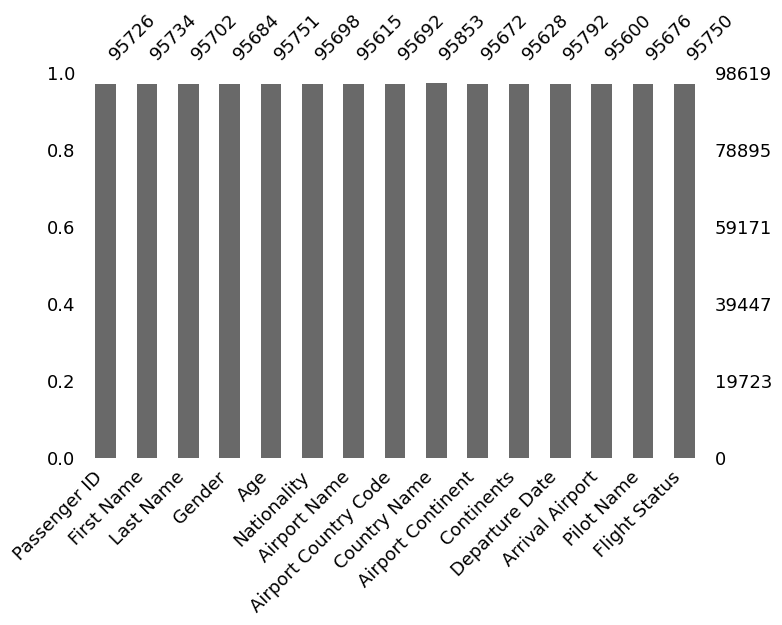

In [23]:
#!pip install missingno -> missingno kütüphanesini kullanabilmek için öncelikle yüklemeniz lazım.

import missingno as msno

msno.bar(df = airldata ,
         figsize = (8, 5),
         fontsize = 13);

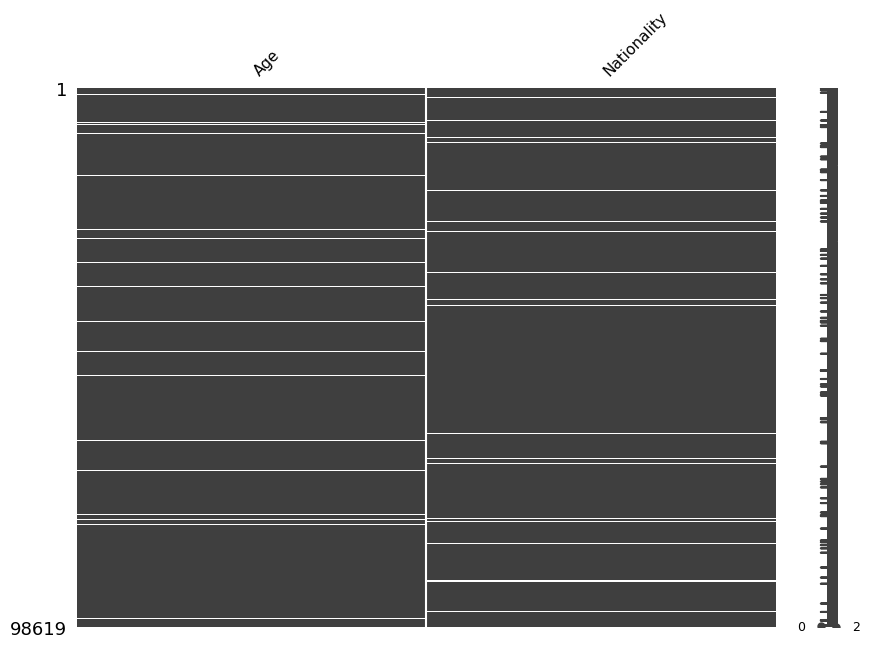

In [24]:
# msno.matrix(), değişkenlerde bulunan eksik değerlerin ilişkili olup olmadığını görsel yolla tespit etmek için kullanılabilir.
msno.matrix(df = airldata[['Age','Nationality']],
            figsize = (10, 7),
            fontsize = 11);

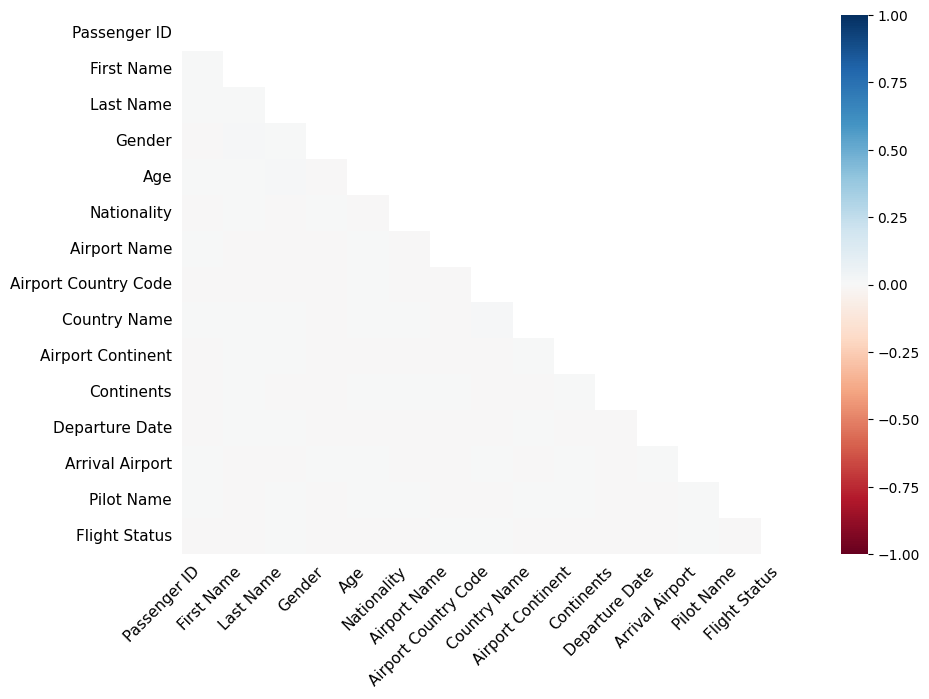

In [25]:
# Nullity Correlation (Heatmap)
# 1'e ne kadar yakınsa, ilişki ihtimali o kadar yüksek.
# 0 ise, birbirlerini etkileyen bir durum yoktur.
msno.heatmap(df = airldata,
             figsize = (10, 7),
             fontsize = 11);

In [26]:
# Eksik verilerin dropna ile silinmesi.
# Kalıcı bir değişiklik yapmaz, bunu yapmak için inplace argümanı kullanılmalı veya atama yapılmalıdır.

airldata.dropna(inplace = False)[:5]


,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62.0,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
2,CdUz2g,Darby,Felgate,Male,67.0,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71.0,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
5,nMJKVh,Lora,Durbann,Female,55.0,Brazil,Coronel Horácio de Mattos Airport,BR,Brazil,SAM,South America,06-10-2022,LEC,Inglis Dolley,On Time
8,QNAs2R,Aleda,Pigram,Female,35.0,Palestinian Territory,Venice Marco Polo Airport,IT,Italy,EU,Europe,8/20/2022,VCE,Daryn Bardsley,On Time


In [27]:
# Sadece bütün değerleri eksik olan bir gözlemi silmek istersek;
airldata.dropna(how = 'all')[:5]

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62.0,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,NaN,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67.0,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71.0,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,NaN,Male,21.0,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time


In [28]:
# Değişken bazında silmek için;
airldata.dropna(axis = 1)

""
0
1
2
3
4
...
98614
98615
98616
98617


In [29]:
# Doldurma işlemlerini gerçekleştirmek için veri setimin bir kopyasını oluşturuyorum.
airldata_fillna =airldata.copy()

airldata_fillna.head(3)

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62.0,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,NaN,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67.0,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time


In [30]:
airldata_fillna.isna().sum()

Passenger ID            2893
First Name              2885
Last Name               2917
Gender                  2935
Age                     2868
Nationality             2921
Airport Name            3004
Airport Country Code    2927
Country Name            2766
Airport Continent       2947
Continents              2991
Departure Date          2827
Arrival Airport         3019
Pilot Name              2943
Flight Status           2869
dtype: int64

In [31]:
# Numerik bir değişkenin mean değeriyle doldurulması
mean_Age= airldata_fillna['Age'].mean()

airldata_fillna['Age'].fillna(value = mean_Age, inplace = True)

airldata_fillna.isna().sum()

/tmp/ipykernel_17/3459767404.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




Passenger ID            2893
First Name              2885
Last Name               2917
Gender                  2935
Age                        0
Nationality             2921
Airport Name            3004
Airport Country Code    2927
Country Name            2766
Airport Continent       2947
Continents              2991
Departure Date          2827
Arrival Airport         3019
Pilot Name              2943
Flight Status           2869
dtype: int64

In [32]:
# Doldurma işleminin döngüyle yapılması
to_be_filled = numerical_features[1:]

for col in to_be_filled:
    airldata_fillna[col].fillna(airldata[col].mean(), inplace = True)

In [33]:
airldata_fillna.isna().sum()

Passenger ID            2893
First Name              2885
Last Name               2917
Gender                  2935
Age                        0
Nationality             2921
Airport Name            3004
Airport Country Code    2927
Country Name            2766
Airport Continent       2947
Continents              2991
Departure Date          2827
Arrival Airport         3019
Pilot Name              2943
Flight Status           2869
dtype: int64

In [34]:
airldata.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,95751.0,45.484538,25.93657,1.0,23.0,46.0,68.0,90.0


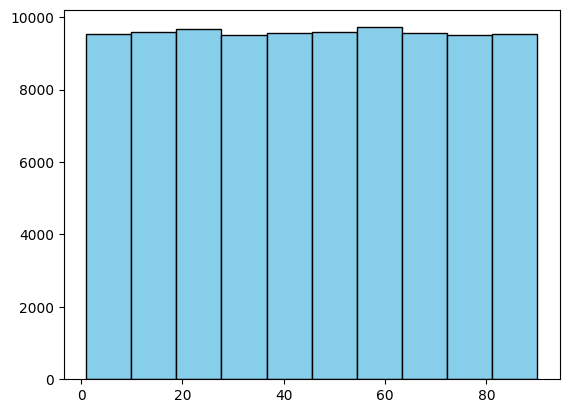

In [35]:
# Histogram oluşturma ve renk ekleme
plt.hist(airldata['Age'], color='skyblue', edgecolor='black')  # Çubuklar için açık mavi, kenarlıklar için siyah

# Grafiği göster
plt.show()

In [36]:
# Kategorik bir değişkenin mode değeriyle doldurulması

# Gender değişkeninde toplam kaç adet eksik değer olduğunu görelim.
airldata_fillna['Gender'].isna().sum()

# Gender değişkeninde en çok tekrar eden değeri(mode) alalım.
Gender_mode = airldata_fillna['Gender'].mode()

# Gender değişkenini mode değeri ile dolduralım.
airldata_fillna['Gender'] = airldata_fillna['Gender'].fillna(value = Gender_mode[0])

# Gender değişkeninde toplam kaç adet eksik değer olduğunu tekrar görelim.
airldata_fillna.isna().sum()

Passenger ID            2893
First Name              2885
Last Name               2917
Gender                     0
Age                        0
Nationality             2921
Airport Name            3004
Airport Country Code    2927
Country Name            2766
Airport Continent       2947
Continents              2991
Departure Date          2827
Arrival Airport         3019
Pilot Name              2943
Flight Status           2869
dtype: int64

In [37]:
airldata_fillna[["Continents"]][:100]

,Continents
0,North America
1,North America
2,Europe
3,North America
4,North America
...,...
95,North America
96,Africa
97,Asia
98,North America


In [38]:
# Önceki değer ile doldurma işlemi
airldata_fillna["Continents"].fillna(method = "bfill")

/tmp/ipykernel_17/3689832940.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.


0        North America
1        North America
2               Europe
3        North America
4        North America
             ...      
98614           Europe
98615           Africa
98616           Europe
98617           Africa
98618           Europe
Name: Continents, Length: 98619, dtype: category
Categories (6, object): ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

In [39]:
# Sonraki değer ile doldurma işlemi
airldata_fillna["Continents"].fillna(method = "ffill")

/tmp/ipykernel_17/649360665.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.


0        North America
1        North America
2               Europe
3        North America
4        North America
             ...      
98614           Europe
98615           Africa
98616           Europe
98617           Africa
98618           Europe
Name: Continents, Length: 98619, dtype: category
Categories (6, object): ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

In [40]:
airldata_categorical_fillna = airldata.copy()

airldata_categorical_fillna.isna().sum()

Passenger ID            2893
First Name              2885
Last Name               2917
Gender                  2935
Age                     2868
Nationality             2921
Airport Name            3004
Airport Country Code    2927
Country Name            2766
Airport Continent       2947
Continents              2991
Departure Date          2827
Arrival Airport         3019
Pilot Name              2943
Flight Status           2869
dtype: int64

In [41]:
airldata_categorical_fillna["Age"].fillna(value = airldata_categorical_fillna.groupby("Continents")["Age"].transform("mean"),
                                       inplace = True)

/tmp/ipykernel_17/2840445679.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/tmp/ipykernel_17/2840445679.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [42]:
airldata_categorical_fillna.isna().sum()

Passenger ID            2893
First Name              2885
Last Name               2917
Gender                  2935
Age                       92
Nationality             2921
Airport Name            3004
Airport Country Code    2927
Country Name            2766
Airport Continent       2947
Continents              2991
Departure Date          2827
Arrival Airport         3019
Pilot Name              2943
Flight Status           2869
dtype: int64

In [43]:
airldata_categorical_fillna[airldata_categorical_fillna[["Continents", "Age"]].isna().all(axis=1)][["Continents", "Age"]]

,Continents,Age
53,NaN,NaN
1469,NaN,NaN
1498,NaN,NaN
1807,NaN,NaN
3035,NaN,NaN
...,...,...
93850,NaN,NaN
94589,NaN,NaN
95136,NaN,NaN
96367,NaN,NaN


In [44]:
airldata_categorical_fillna[airldata_categorical_fillna['Age'].isnull()]

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
53,09lGmv,Tamas,NaN,Male,NaN,Mali,Diamantina Lakes Airport,AU,Australia,OC,NaN,11/23/2022,DYM,Clemente Mateev,Delayed
1469,2BE2Ad,Risa,Pester,Female,NaN,Indonesia,Merville-Calonne Airport,FR,France,EU,NaN,02-12-2022,HZB,Carmen Scneider,On Time
1498,eXK9vC,Salvatore,Yankin,Male,NaN,China,Abel Santamaria Airport,CU,Cuba,NAM,NaN,12/21/2022,SNU,Ardelia Eland,Cancelled
1807,QsdW2Q,Mart,Fairpo,Male,NaN,New Zealand,Mindiptana Airport,ID,Indonesia,AS,NaN,2/16/2022,MDP,Shandy Hunt,On Time
3035,OD5tmy,Albie,Wife,Male,NaN,Reunion,Ndende Airport,GA,Gabon,AF,NaN,2/24/2022,KDN,Karita Hoggins,Delayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93850,Ssyqnv,Rosa,Leaming,Female,NaN,China,Hamburg Airport,DE,Germany,EU,NaN,6/24/2022,HAM,Steffen MacCarter,Cancelled
94589,P1oQ6N,Emmett,Loreit,Male,NaN,Russia,Beslan Airport,RU,Russian Federation,EU,NaN,10/22/2022,OGZ,Cloe Farrear,Delayed
95136,iVm5WP,Gayler,Johanning,Male,NaN,Palestinian Territory,Koro Island Airport,FJ,Fiji,OC,NaN,06-09-2022,KXF,Meir Prando,Cancelled
96367,51NXDe,Pryce,Fitzsimon,Male,NaN,Greece,Rafael Hernandez Airport,PR,Puerto Rico,NAM,NaN,10/14/2022,BQN,Dinah Hughman,Delayed


# 3. Kategorik Değişken Analizi

In [45]:
airldata = airl_data.copy()
airldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  object
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(1), object(14)
memory usage

In [46]:
# Spesifik bir veri tipi tutan değişkenleri seçmek için select_dtypes() kullanabiliriz.
airldata_categorical = airldata.select_dtypes(include = "object")
airldata_categorical.head(3)

,Passenger ID,First Name,Last Name,Gender,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time


In [47]:
# Kategorik bir değişkendeki benzersiz değerleri gözlemlemek için unique() kullanabiliriz.
airldata_categorical["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [48]:
# Kategorik değişkenlerdeki benzersiz değerlerin sayısını görebilmek için nunique() kullanabiliriz.
for col in airldata_categorical.columns:
    print(f'There are {airldata_categorical[col].nunique()} unique values in "{col}" categorical feature.\n')

There are 98619 unique values in "Passenger ID" categorical feature.

There are 8437 unique values in "First Name" categorical feature.

There are 41658 unique values in "Last Name" categorical feature.

There are 2 unique values in "Gender" categorical feature.

There are 240 unique values in "Nationality" categorical feature.

There are 9062 unique values in "Airport Name" categorical feature.

There are 235 unique values in "Airport Country Code" categorical feature.

There are 235 unique values in "Country Name" categorical feature.

There are 6 unique values in "Airport Continent" categorical feature.

There are 6 unique values in "Continents" categorical feature.

There are 364 unique values in "Departure Date" categorical feature.

There are 9024 unique values in "Arrival Airport" categorical feature.

There are 98605 unique values in "Pilot Name" categorical feature.

There are 3 unique values in "Flight Status" categorical feature.



In [49]:
# Her bir kategorik değişken için toplam gözlem sayısını value_counts() ile buluyoruz.
for col in airldata_categorical.columns:
    print(f'{airldata_categorical[col].value_counts()}\n', 5*"*********")

Passenger ID
ABVWIg    1
egX7mI    1
AWXSp0    1
225A0s    1
bUDsDB    1
         ..
BUZEJj    1
a2aOsu    1
gfzeie    1
gW1XM5    1
8JYEcz    1
Name: count, Length: 98619, dtype: int64
 *********************************************
First Name
Gale       37
Brett      36
Conny      35
Gerrie     35
Haleigh    35
           ..
Kalila      2
Brina       2
Maggy       2
Nicolle     1
Diann       1
Name: count, Length: 8437, dtype: int64
 *********************************************
Last Name
Dyball        17
Capron        15
Ducker        13
Richfield     12
Danaher       11
              ..
Orwell         1
Scarff         1
Stapleford     1
Thurner        1
Lucken         1
Name: count, Length: 41658, dtype: int64
 *********************************************
Gender
Male      49598
Female    49021
Name: count, dtype: int64
 *********************************************
Nationality
China                     18317
Indonesia                 10559
Russia                     5693
Philippine

In [50]:
# Kategorik bir değişkende bulunan kategorik değerleri bir liste haline getirip sonra kullanabiliriz.
flst_categories = airldata["Flight Status"].unique().tolist()[::-1]
flst_categories

['Cancelled', 'Delayed', 'On Time']

In [51]:
# Ordinal değişken nasıl oluşturulur?
from pandas.api.types import CategoricalDtype

airldata["Flight Status"] = airldata["Flight Status"].astype(CategoricalDtype(categories = flst_categories, ordered = True))

# ALIŞTIRMA: astype('category') ile CategoricalDtype arasında fark var mıdır? Varsa nedir? Araştırın.

In [52]:
airldata["Flight Status"].head()

0    On Time
1    On Time
2    On Time
3    Delayed
4    On Time
Name: Flight Status, dtype: category
Categories (3, object): ['Cancelled' < 'Delayed' < 'On Time']

3.2 Kategorik Değişkenlerde Görselleştirme İşlemleri

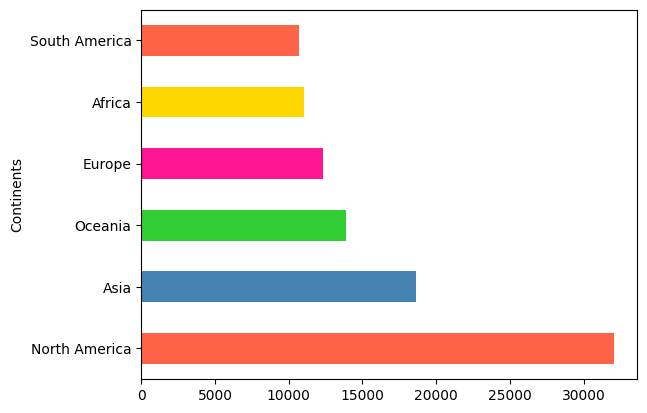

In [53]:
# Kategorik bir değişkendeki kategorilerin gözlem sayılarını basitçe görselleştirelim.
airldata['Continents'].value_counts().plot.barh(
    color=['#FF6347', '#4682B4', '#32CD32', '#FF1493', '#FFD700']);

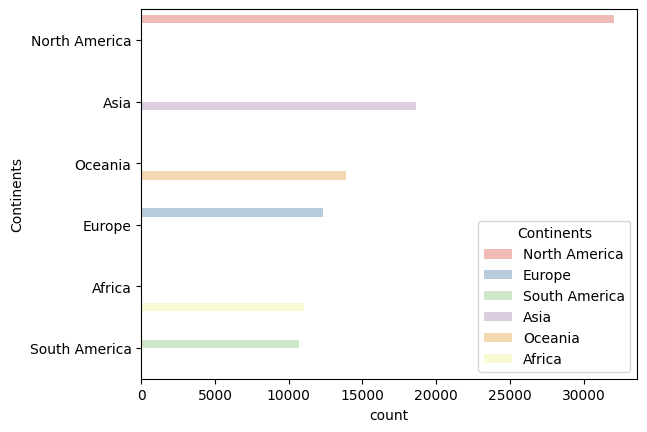

In [54]:
sns.countplot(data = airldata,
              y = "Continents",
              hue = "Continents",
              order = airldata["Continents"].value_counts().index,
              palette = "Pastel1");

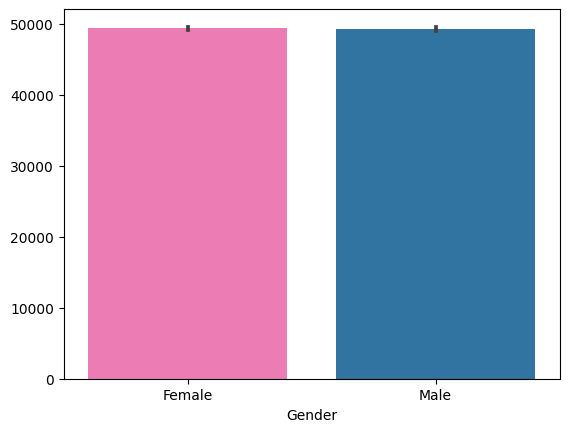

In [55]:
sns.barplot(data = airldata, x = "Gender", y = airldata.Gender.index, 
             palette={"Male": "#1F77B4", "Female": "#FF69B4"});

/tmp/ipykernel_17/191380026.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


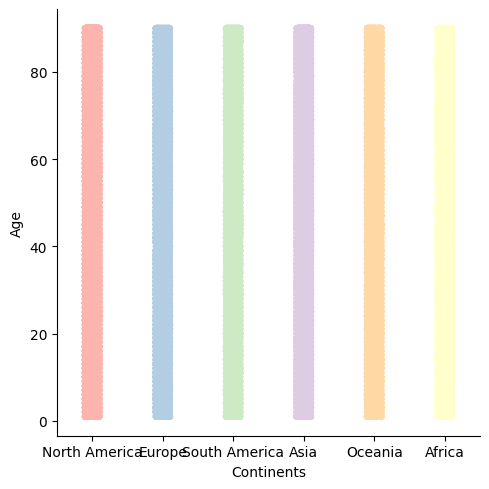

In [56]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.catplot(data = airldata,
            x = "Continents",
            y = "Age",
           palette="Pastel1");

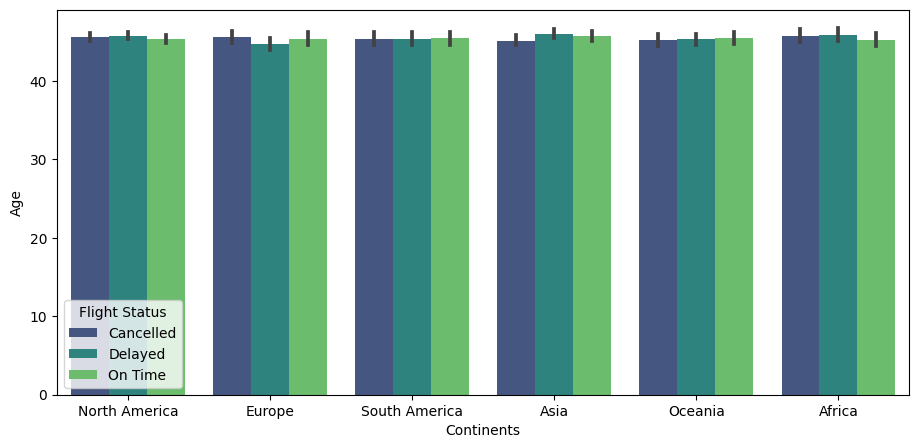

In [57]:
plt.figure(figsize = (11, 5))
sns.barplot(data = airldata,
            x = "Continents",
            y = "Age",
            hue = "Flight Status",
            palette="viridis");

In [58]:
airldata.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time


Soru: Yaş ortalaması en yüksek olan kıta hangisidir?

In [59]:
airldata_Age = airldata.groupby(by ="Continents")["Age"].mean().to_frame().reset_index().sort_values(by ="Age", ascending = False)

airldata_Age

,Continents,Age
1,Asia,45.653861
0,Africa,45.635993
3,North America,45.581619
5,South America,45.373204
4,Oceania,45.371628
2,Europe,45.220592


In [60]:
airldata.groupby(by = ['Continents', 'Gender'])['Age'].mean().to_frame().reset_index().sort_values(by = "Age", ascending = False)[:5]

,Continents,Gender,Age
2,Asia,Female,46.017561
0,Africa,Female,45.752973
9,Oceania,Male,45.648837
6,North America,Female,45.593847
7,North America,Male,45.569722


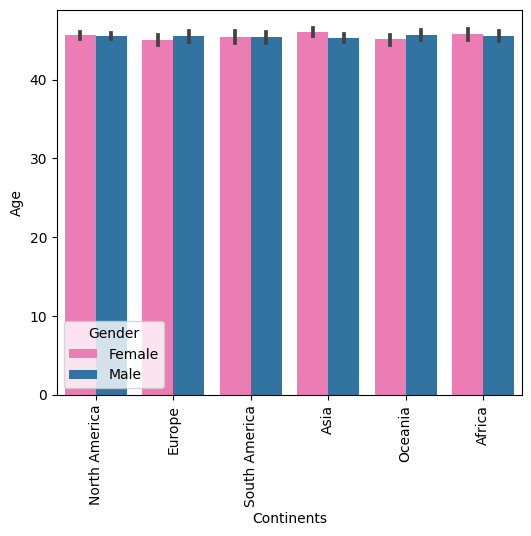

In [61]:
plt.figure(figsize = (6, 5))
plt.xticks(rotation = 90)
sns.barplot(data = airldata, x = "Continents", y = "Age", hue = "Gender",
           palette={"Male": "#1F77B4", "Female": "#FF69B4"});

Soru: Herhangi bir uçuş durumu için, havaalanı kıtası kategorisi bazında kaç adet kayıt var?

In [62]:
airldata_location = airldata.groupby(by = "Flight Status")["Airport Continent"].value_counts().to_frame().reset_index().sort_values(by = "count", ascending = False)
airldata_location_usa = airldata_location[airldata_location['Flight Status'] == "Delayed"]
airldata_location_usa

/tmp/ipykernel_17/2182333250.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,Flight Status,Airport Continent,count
6,Delayed,NAM,10696
7,Delayed,AS,6160
8,Delayed,OC,4634
9,Delayed,EU,4178
10,Delayed,AF,3654
11,Delayed,SAM,3509


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


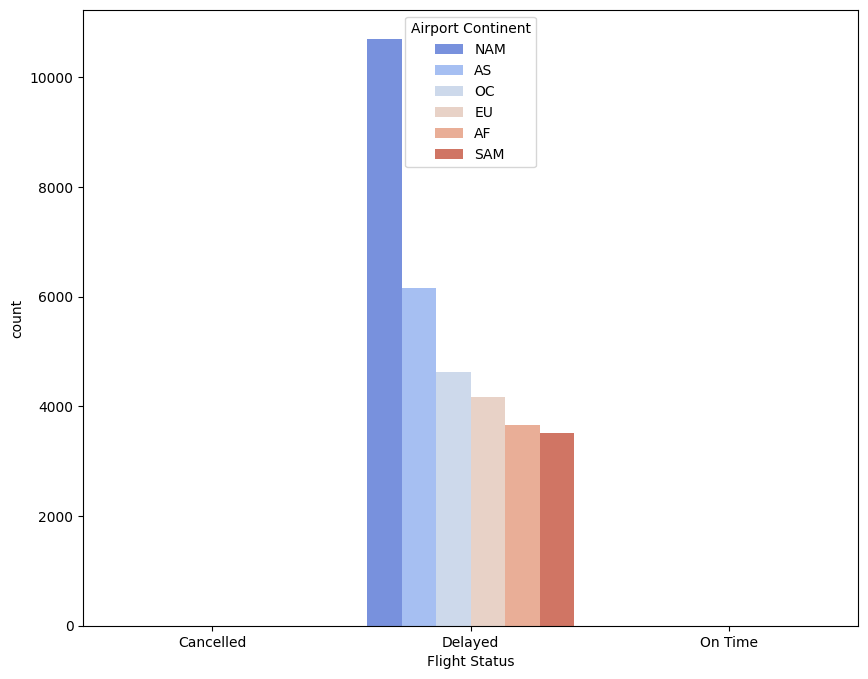

In [63]:
plt.figure(figsize = (10, 8))
sns.barplot(data = airldata_location_usa, x = "Flight Status", y = 'count', hue = "Airport Continent",
           palette="coolwarm");

# 4. Sürekli Değişken Analizi

In [64]:
# Veri setindeki numerik kolonları seçmek için aşağıdaki yapıyı kullanabiliriz.
airldata_numerical = airldata.select_dtypes(include = ["float64", "int64"])
airldata_numerical.head()

,Age
0,62
1,62
2,67
3,71
4,21


In [65]:
airldata_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,98619.0,45.504021,25.929849,1.0,23.0,46.0,68.0,90.0


In [66]:
# Bir veri setindeki numerik kolonların istatistiksel bilgilerine erişmek için basitçe bu tarz bir fonksiyon yazabiliriz.

def give_stats(dataframe: pd.DataFrame) -> None:
    """Prints statistical information for numerical columns.

    Args:
        dataframe (pd.DataFrame): DataFrame object.
    
    Return:
        None
    
    """

    num_airldata = dataframe.select_dtypes(include = ["float", "int"])

    for col in num_airldata.columns:
        print(f"**********{col}**********")
        print(f"Mean value of {col} is {num_airldata[col].mean():.2f}")
        print(f"Std value of {col} is {num_airldata[col].std():.2f}")
        print(f"Max value of {col} is {num_airldata[col].max()}")
        print(f"Min value of {col} is {num_airldata[col].min()}")
        print(f"Count value of {col} is {num_airldata[col].count()}")
        print(f"Median value of {col} is {num_airldata[col].median()}\n")

In [67]:
give_stats(dataframe = airldata)

**********Age**********
Mean value of Age is 45.50
Std value of Age is 25.93
Max value of Age is 90
Min value of Age is 1
Count value of Age is 98619
Median value of Age is 46.0



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instea

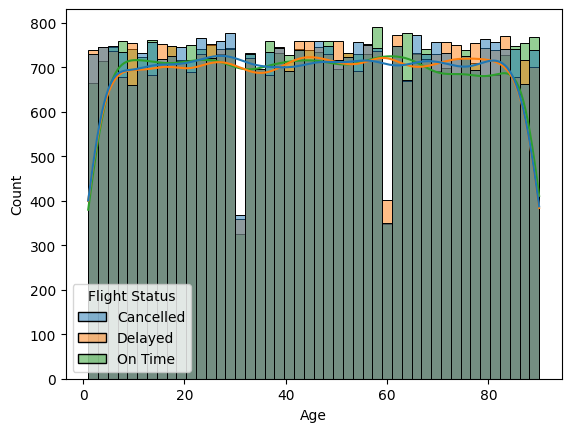

In [68]:
# Numerik bir kolonun dağılımını görmek için histogram kullanırız.
sns.histplot(data =airldata, x = "Age", kde = True, hue = "Flight Status");

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


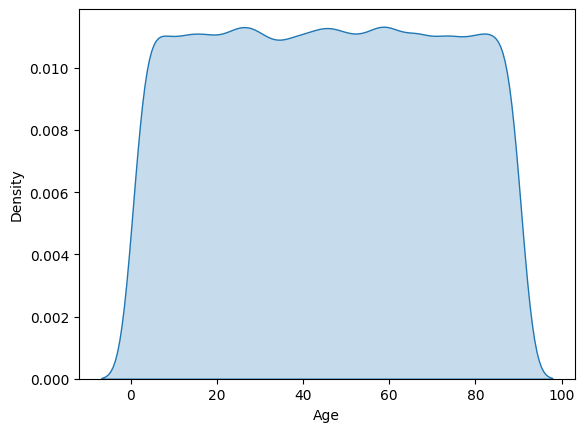

In [69]:
# kdeplot ise ilgili numerik değişkenin yoğunluğunu gösterir.
sns.kdeplot(airldata['Age'], fill = True);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


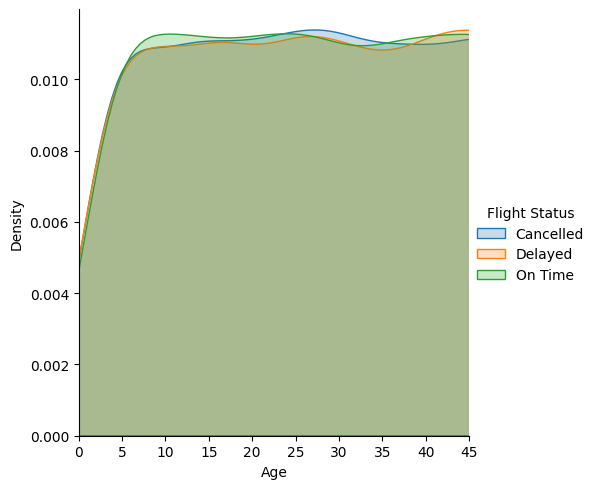

In [70]:
# FacetGrid kullanarak kategorik kırılımda yoğunluk gözlemleyebiliriz.
sns.FacetGrid(data =airldata,
              hue = "Flight Status",
              height = 5,
              xlim = (0, 45)).map(sns.kdeplot, "Age", fill = True).add_legend();

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


<Figure size 1500x400 with 0 Axes>

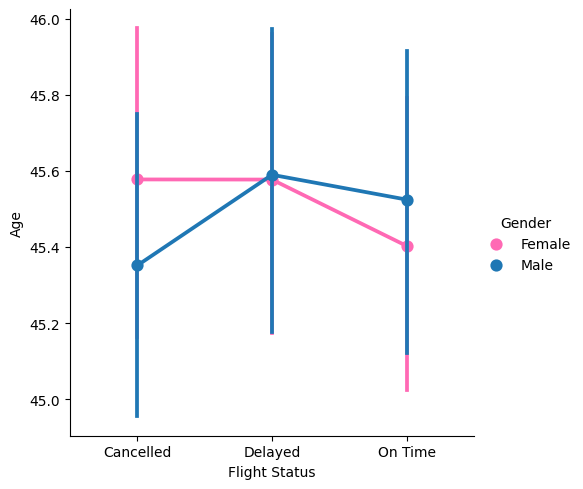

In [71]:
# Catplot ile numerik bir değişkenin kategorik bazda ve kırılımdaki dağılımını görebiliriz.
plt.figure(figsize = (15, 4))
sns.catplot(data = airldata, x = "Flight Status", y = "Age", hue = "Gender", kind = "point",
            palette={"Male": "#1f77b4", "Female": "#FF69B4"});

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


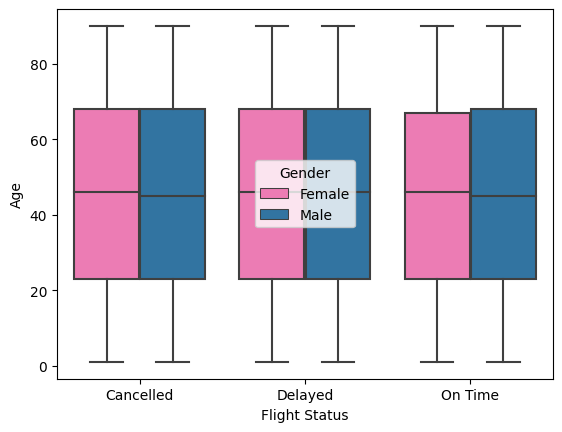

In [72]:
# Boxplot kategorik olarak numerik dağılımı gösterir, çeyreklik değerler ve IQR'a göre aykırı değerler de boxplot ile gözlemlenebilir.
sns.boxplot(data = airldata,
            x = "Flight Status",
            y = "Age",
            hue = "Gender",palette={"Male": "#1F77B4", "Female": "#FF69B4"});

# 5. Aykırı Değer Analizi (Outliers)

In [73]:
airldata = airl_data.copy()

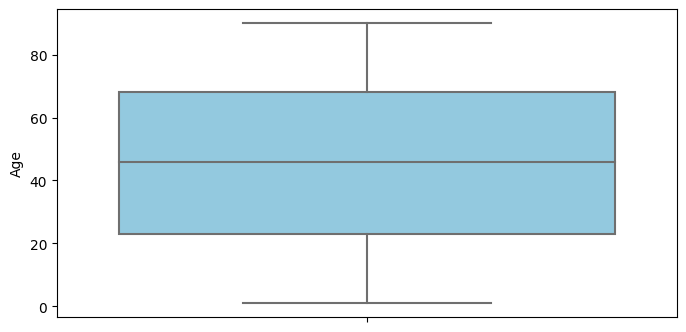

In [74]:
# Bir değişkendeki IQR'a göre aykırı gözlemleri boxplot kullanarak görselleştirelim.
plt.figure(figsize = (8, 4))
sns.boxplot(data = airldata,
            y = airldata["Age"],
            orient = "v",
            color="skyblue",           
            linewidth=1.5,             
            fliersize=6,               
            flierprops=dict(markerfacecolor='black', marker='o'));

In [75]:
airldata_Age = airldata['Age']
airldata_Age

0        62
1        62
2        67
3        71
4        21
         ..
98614    85
98615    19
98616    65
98617    34
98618    10
Name: Age, Length: 98619, dtype: int64

In [76]:
# Quantile değerlerin belirlenmesi.
Q1 = airldata_Age.quantile(0.25)
Q3 = airldata_Age.quantile(0.75)

print(Q1)
print(Q3)

# IQR değerin belirlenmesi.
IQR = Q3-Q1
print(IQR)

# Alt ve üst sınırların belirlenmesi.
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR

23.0
68.0
45.0


In [77]:
# Upper_fence üzerinde kalan aykırı gözlemlerin index değerlerini, daha sonra kullanmak üzere bir değişkende tutabiliriz.
outlier_idx = airldata_Age[airldata_Age > upper_fence].index

outlier_idx

Index([], dtype='int64')

In [78]:
airldata_Age[airldata_Age > upper_fence]

Series([], Name: Age, dtype: int64)

In [79]:
airldata_delete = airldata[~(airldata_Age > upper_fence)]

airldata_delete

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98614,hnGQ62,Gareth,Mugford,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,12-11-2022,HAA,Pammie Kingscote,Cancelled
98615,2omEzh,Kasey,Benedict,Female,19,Russia,Ampampamena Airport,MG,Madagascar,AF,Africa,10/30/2022,IVA,Dorice Lochran,Cancelled
98616,VUPiVG,Darrin,Lucken,Male,65,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,09-10-2022,ABC,Gearalt Main,On Time
98617,E47NtS,Gayle,Lievesley,Female,34,China,Gagnoa Airport,CI,Côte d'Ivoire,AF,Africa,10/26/2022,GGN,Judon Chasle,Cancelled


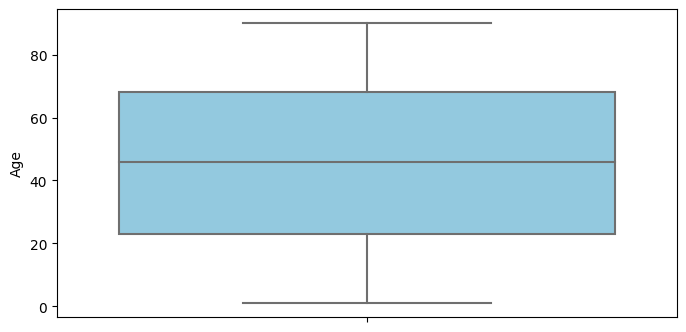

In [80]:
plt.figure(figsize = (8, 4))
sns.boxplot(data = airldata_delete,
            y = airldata_delete["Age"],
            orient = "v",
            color="skyblue",           
            linewidth=1.5,             
            fliersize=6,               
            flierprops=dict(markerfacecolor='black', marker='o'));

# 6. Feature Engineering

In [81]:
airldata.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time


# Sonuç ve Öneriler


Elde ettiğim analizler ışığında, bu veri aşağıdaki gibi bir probleme çözüm olabilir:

Havayolu Şirketi Performans Karşılaştırması
Farklı havayolu şirketlerinin uçuş verilerini analiz ederek performans karşılaştırmaları yapılabilir.
Havayolu şirketlerinin performansının karşılaştırılması problemi üzerinden; uçuşların zamanında kalkma, müşteri memnuniyeti, uçuş sıklığı gibi faktörlere göre havayolu şirketlerini karşılaştıran bir analiz yapılabilir.

Veri setinde sayısal ve kategorik verilerin karışık olması ve çözmek istediğiniz problemin havayolu şirketlerinin performansını karşılaştırmak olması göz önüne alındığında, en iyi sonuçları alabileceğiniz modeller:

Ağaç Tabanlı Yöntemler (XGBoost, LightGBM): Veri setinin büyüklüğüne ve karmaşıklığına bağlı olarak, bu yöntemler genellikle mükemmel sonuçlar verir. Özellikle havayolu şirketlerinin performansını sınıflandırırken veya bir skor tahmin ederken çok etkili olabilirler.

SVM: Eğer veri setiniz küçükse ve doğrusal olmayan sınıflandırmalar yapmak istiyorsanız, SVM iyi bir seçenek olabilir.

Derin Öğrenme: Eğer çok büyük bir veri setiniz varsa ve karmaşık ilişkileri öğrenmek istiyorsanız, derin öğrenme modelleri (DNN) kullanılabilir.

Kümeleme (Clustering): Performans gruplarına ayırma amacıyla kümelenme algoritmaları kullanabilirsiniz (özellikle DBSCAN).

En Uygun Seçim:

XGBoost veya LightGBM kullanmak en iyi sonuçları verecektir.